In [1]:
import netrw
from netrw.rewire import KarrerRewirer, AlgebraicConnectivity, NetworkXEdgeSwap
import networkx as nx

In [5]:
G = nx.fast_gnp_random_graph(100, 0.1)

p = netrw.get_property_distribution_choosing_chaos(G, AlgebraicConnectivity, nx.assortativity.degree_pearson_correlation_coefficient, burn_in=10, num_samples=20)

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  import inspect


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [6]:
import matplotlib.pyplot as plt

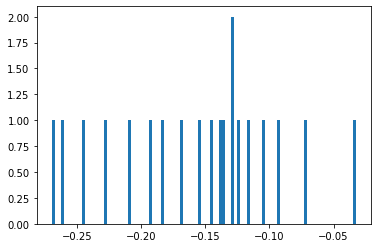

In [7]:
plt.figure()
plt.hist(p, bins=100)
plt.show()

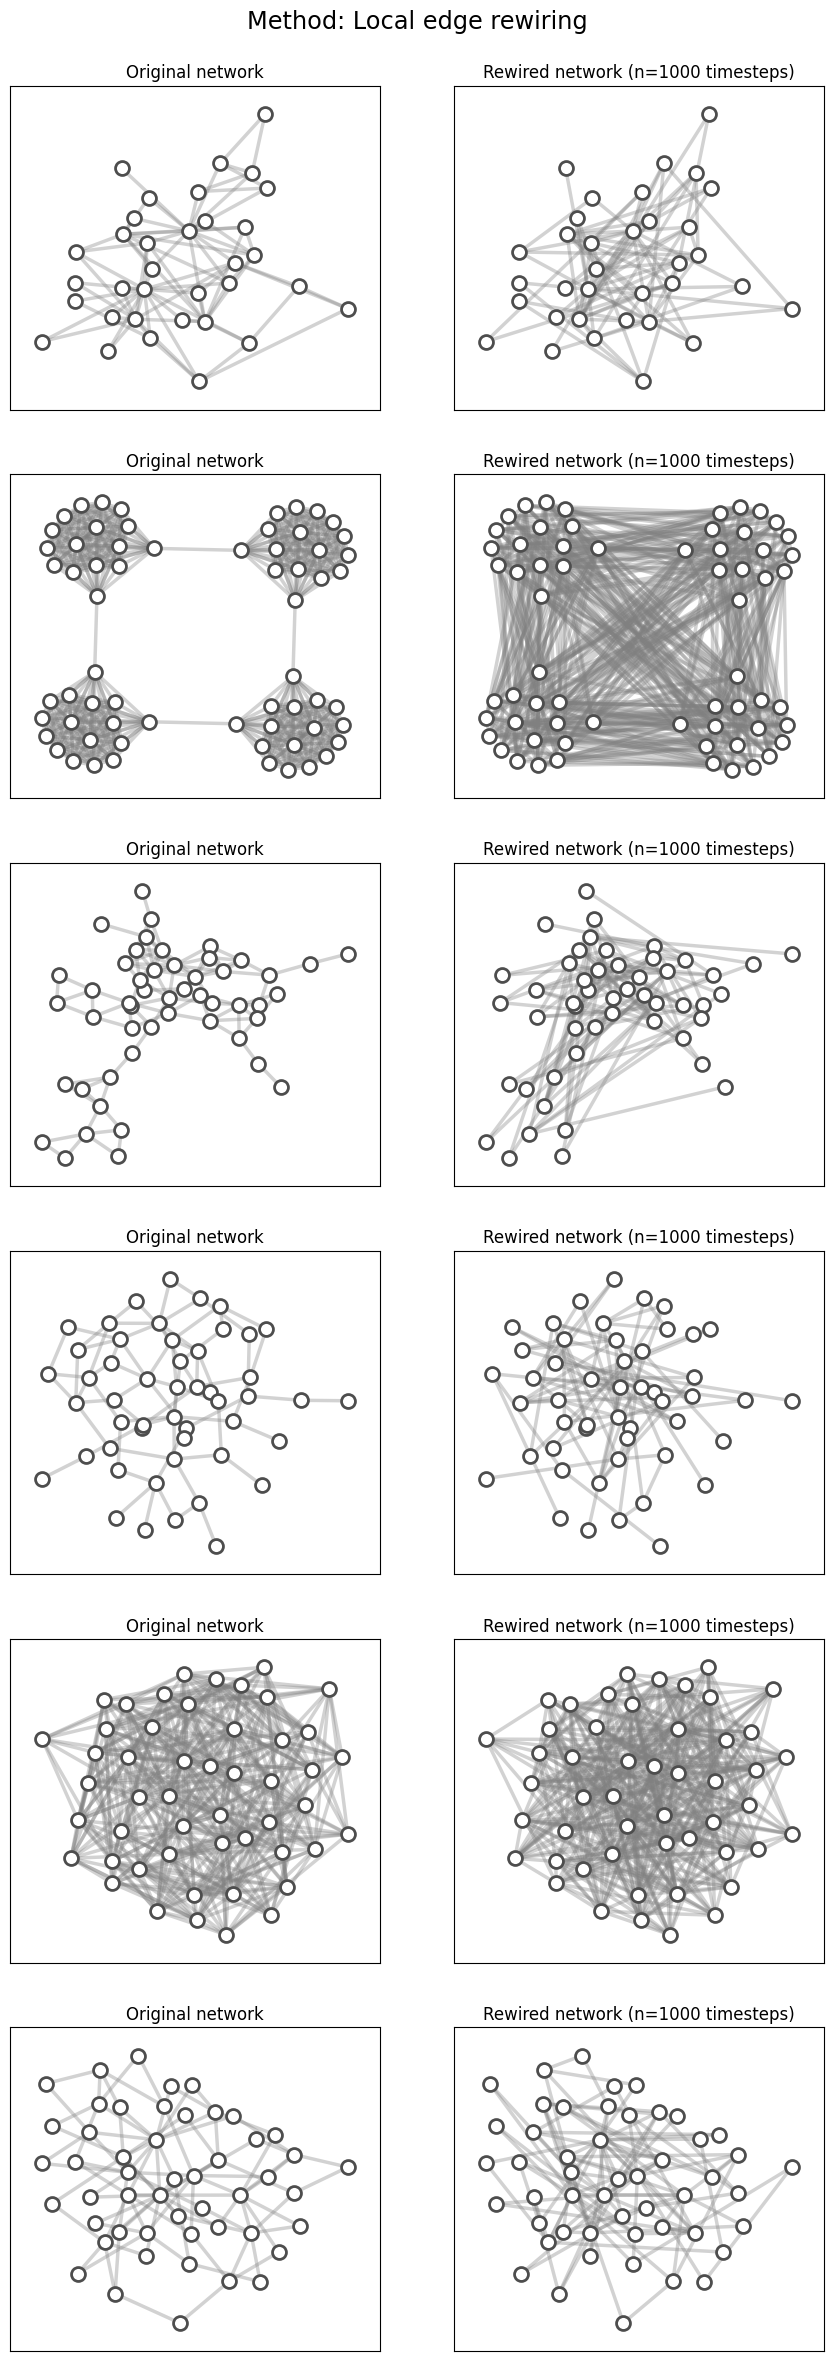

In [9]:
# example params for node sizes, edge widths, etc.
ns = 100; lw = 2; ew = 2.5; n_ec = '.3'

rewiring_method = 'Local edge rewiring'

list_of_gs = [nx.karate_club_graph(), 
              nx.ring_of_cliques(4, 16),
              nx.random_geometric_graph(50, 0.175),
              nx.erdos_renyi_graph(50, 0.05),
              nx.erdos_renyi_graph(50, 0.30),
              nx.barabasi_albert_graph(50, 2),
              ]

fig, ax = plt.subplots(len(list_of_gs),2,figsize=(10.5,5*len(list_of_gs)),dpi=100)

timesteps = 1000

ax[(0,0)].text(1.1, 1.2, "Method: "+rewiring_method, ha='center', va='center',
               transform=ax[(0,0)].transAxes, fontsize='xx-large')

for ix,G0 in enumerate(list_of_gs):

    pos = nx.kamada_kawai_layout(G0)
    G = G0.copy()

    for _ in range(timesteps):
        nx.double_edge_swap(G)

    # draw original network
    nx.draw_networkx_nodes(G0, pos, ax=ax[(ix,0)], node_size=ns, node_color='w', edgecolors=n_ec, linewidths=lw)
    nx.draw_networkx_edges(G0, pos, ax=ax[(ix,0)], edge_color='.5', width=ew, alpha=0.35)
    
    # draw rewired network
    nx.draw_networkx_nodes(G, pos, ax=ax[(ix,1)], node_size=ns, node_color='w', edgecolors=n_ec, linewidths=lw)
    nx.draw_networkx_edges(G, pos, ax=ax[(ix,1)], edge_color='.5', width=ew, alpha=0.35)

    ax[(ix,0)].set_title('Original network')
    ax[(ix,1)].set_title('Rewired network (n=%i timesteps)'%timesteps)

plt.show()